# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [83]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [33]:
# Load data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [34]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [35]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [36]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [41]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
df.select_dtypes(include='number').corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


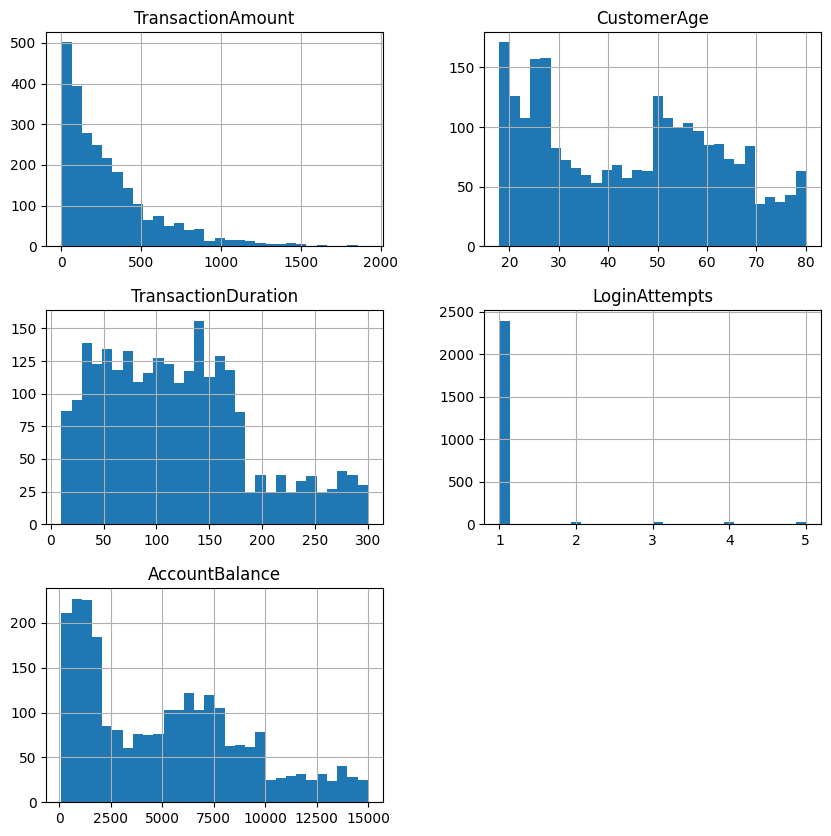

In [47]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(10, 10), bins=30)
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

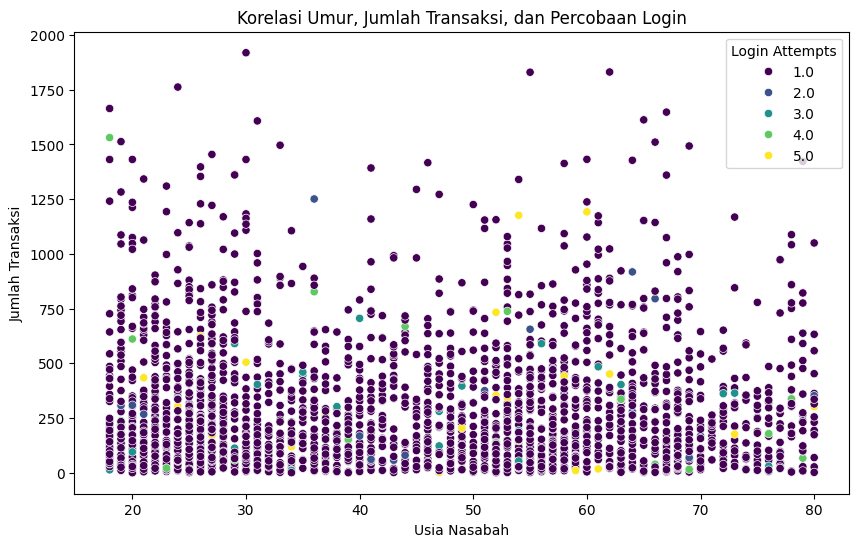

In [51]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CustomerAge', y='TransactionAmount', hue='LoginAttempts', palette='viridis')
plt.title("Korelasi Umur, Jumlah Transaksi, dan Percobaan Login")
plt.xlabel("Usia Nasabah")
plt.ylabel("Jumlah Transaksi")
plt.legend(title="Login Attempts")
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [52]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [53]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [172]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = StandardScaler()
numerical_cols = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts', 'CustomerAge']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup,AmountGroup,Target
0,-1.194176,2023-04-11 16:29:14,1,36,14,0,1.430602,0,-0.552513,0.0,-0.000123,2024-11-04 8:08:08,0,0,2
1,0.776166,2023-06-27 16:44:19,1,15,51,0,1.317851,0,0.309169,0.0,2.229937,2024-11-04 8:09:35,0,0,0
2,-0.583732,2023-07-10 18:16:08,1,23,8,2,-1.444550,3,-0.911547,0.0,-1.029142,2024-11-04 8:07:04,1,0,2
3,-0.267030,2023-05-05 16:32:11,1,33,1,2,-1.049921,3,-1.356749,0.0,0.891429,2024-11-04 8:09:06,1,0,2
4,-1.197658,2023-10-16 17:51:24,1,1,90,2,0.021214,3,1.127767,0.0,0.597501,2024-11-04 8:06:39,1,0,3


In [57]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address'], axis=1)

In [61]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = ['TransactionType', 'Location', 'MerchantID', 'Channel', 'CustomerOccupation']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,-0.970546,2023-04-11 16:29:14,1,36,14,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,0.268963,2023-06-27 16:44:19,1,15,51,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,-0.586526,2023-07-10 18:16:08,1,23,8,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,-0.387294,2023-05-05 16:32:11,1,33,1,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,-0.972736,2023-10-16 17:51:24,0,1,90,2,NaN,3,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [160]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'MerchantID',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate',
 'AgeGroup',
 'AmountGroup',
 'Target']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [64]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.fillna(df.median(numeric_only=True))
df.isnull().sum()

,0
TransactionAmount,0
PreviousTransactionDate,28
TransactionType,0
Location,0
MerchantID,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0


In [65]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [68]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
num_cols = df.select_dtypes(include='number').columns
threshold = 0.01 * len(df)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask_outliers = (df[col] < lower) | (df[col] > upper)
    outlier_count = mask_outliers.sum()

    if outlier_count <= threshold:
        df = df[~mask_outliers]
    else:
        df[col] = df[col].mask(mask_outliers, df[col].median())

df.head()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,-0.970546,2023-04-11 16:29:14,1,36,14,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,0.268963,2023-06-27 16:44:19,1,15,51,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,-0.586526,2023-07-10 18:16:08,1,23,8,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,-0.387294,2023-05-05 16:32:11,1,33,1,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,-0.972736,2023-10-16 17:51:24,1,1,90,2,0.018031,3,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [168]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
df['AgeGroup'] = pd.cut(df['CustomerAge'],
                        bins=[0, 25, 45, 65, 100],
                        labels=['Muda', 'Dewasa', 'Paruh Baya', 'Lansia'])

df['AmountGroup'] = pd.cut(df['TransactionAmount'],
                           bins=[-np.inf, 100, 1000, 5000, np.inf],
                           labels=['Kecil', 'Sedang', 'Besar', 'Sangat Besar'])

df['AgeGroup'] = LabelEncoder().fit_transform(df['AgeGroup'])
df['AmountGroup'] = LabelEncoder().fit_transform(df['AmountGroup'])

df.head()



,TransactionAmount,PreviousTransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup,AmountGroup,Target
0,-0.593580,2023-04-11 16:29:14,1,36,14,0,1.305456,0,-0.504729,-2.455553,-0.002368,2024-11-04 8:08:08,0,0,2
1,-0.586011,2023-06-27 16:44:19,1,15,51,0,1.199750,0,0.295139,-2.455553,2.095084,2024-11-04 8:09:35,0,0,0
2,-0.591235,2023-07-10 18:16:08,1,23,8,2,-1.390061,3,-0.838008,-2.455553,-0.970199,2024-11-04 8:07:04,1,0,2
3,-0.590018,2023-05-05 16:32:11,1,33,1,2,-1.020088,3,-1.251274,-2.455553,0.836169,2024-11-04 8:09:06,1,0,2
4,-0.593593,2023-10-16 17:51:24,1,1,90,2,-0.015876,3,1.055015,-2.455553,0.559719,2024-11-04 8:06:39,1,0,3


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [174]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,AmountGroup,Target
count,2.514000e+03,2514.0,2514.000000,2514.000000,2514.00000,2.514000e+03,2514.000000,2.514000e+03,2514.0,2.514000e+03,2514.000000,2514.0,2514.000000
mean,2.261075e-17,1.0,21.284010,49.155131,1.01074,2.402392e-17,1.530231,8.479030e-18,0.0,1.201196e-17,0.508353,0.0,1.660302
std,1.000199e+00,0.0,12.397534,29.315208,0.83084,1.000199e+00,1.150477,1.000199e+00,0.0,1.000199e+00,0.500030,0.0,1.085281
min,-1.269421e+00,1.0,0.000000,0.000000,0.00000,-1.500925e+00,0.000000,-1.572169e+00,0.0,-1.292493e+00,0.000000,0.0,0.000000
25%,-8.182798e-01,1.0,11.000000,24.000000,0.00000,-9.935456e-01,0.250000,-8.110171e-01,0.0,-9.267508e-01,0.000000,0.0,1.000000
50%,-1.208934e-01,1.0,21.000000,49.000000,1.00000,2.121370e-02,2.000000,-1.073103e-01,0.0,-9.763799e-02,1.000000,0.0,2.000000
75%,5.441753e-01,1.0,32.000000,73.000000,2.00000,8.104709e-01,3.000000,5.963964e-01,0.0,6.522884e-01,1.000000,0.0,3.000000
max,2.922025e+00,1.0,43.000000,100.000000,3.00000,1.994357e+00,4.000000,2.592626e+00,0.0,2.544348e+00,1.000000,0.0,3.000000


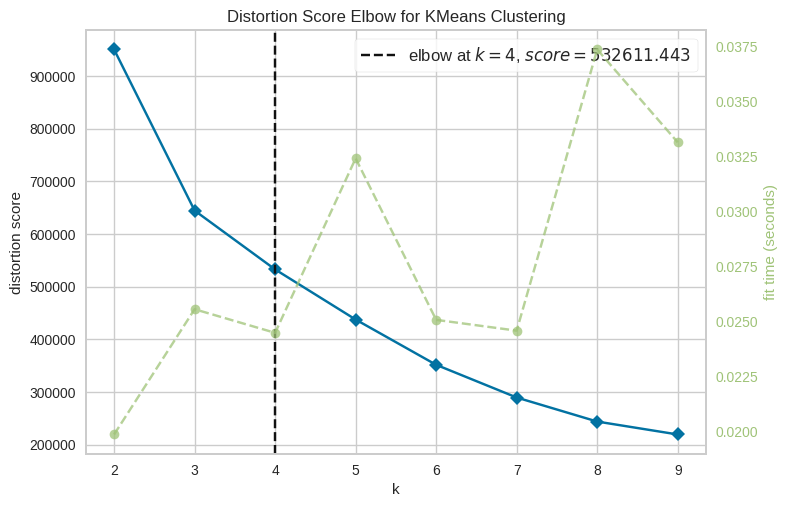

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [175]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df.select_dtypes(include='number')
model = KMeans(random_state=42)
elbow = KElbowVisualizer(model, k=(2, 10))
elbow.fit(X)
elbow.show()

In [176]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=elbow.elbow_value_, random_state=42)
X = df.select_dtypes(include='number')
df['cluster'] = model_kmeans.fit_predict(X)

Jalankan cell code ini untuk menyimpan model kamu.

In [177]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(___, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [178]:
# Menghitung dan menampilkan nilai Silhouette Score.
X = df.select_dtypes(include='number')
silhouette = silhouette_score(X, df['cluster'])
silhouette

np.float64(0.3779101912861777)

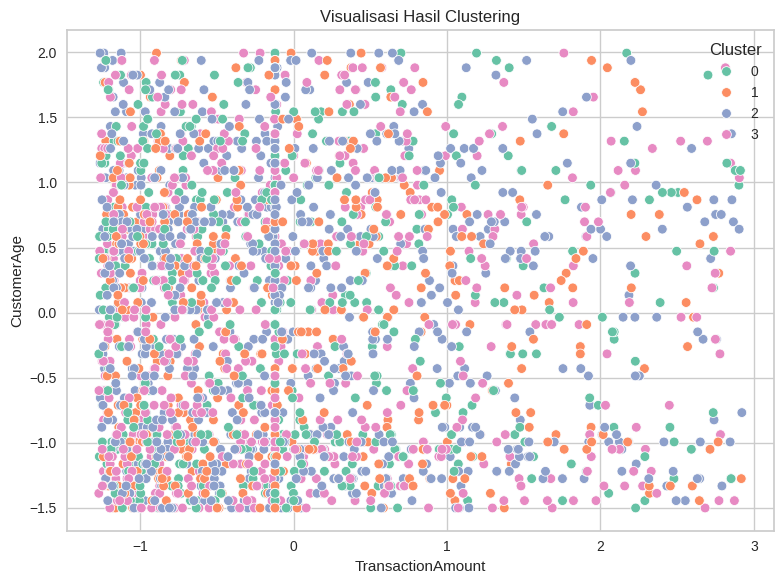

In [179]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='CustomerAge', hue='cluster', palette='Set2')
plt.title('Visualisasi Hasil Clustering')
plt.xlabel('TransactionAmount')
plt.ylabel('CustomerAge')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [180]:
# Membangun model menggunakan PCA.
X = df.select_dtypes(include='number')
model = PCA(n_components=2, random_state=42)
X_pca = model.fit_transform(X)
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']
df_pca.head()


,PCA1,PCA2,cluster
0,-35.019495,15.011371,2.0
1,1.755108,-6.337657,0.0
2,-41.126312,2.072811,2.0
3,-48.043293,12.128406,2.0
4,40.703701,-20.597988,3.0


In [181]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [183]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df.select_dtypes(include='number').groupby(df['cluster']).agg(['mean', 'min', 'max'])

TransactionAmount                     TransactionType          \
                     mean       min       max            mean min max   
cluster                                                                 
0                0.019788 -1.269095  2.912721             1.0   1   1   
1               -0.024071 -1.260063  2.918325             1.0   1   1   
2                0.027186 -1.265449  2.922025             1.0   1   1   
3               -0.028957 -1.269421  2.905757             1.0   1   1   

          Location         MerchantID  ... AgeGroup AmountGroup          \
              mean min max       mean  ...      max        mean min max   
cluster                                ...                                
0        11.225681   0  30  44.896887  ...        1         0.0   0   0   
1        31.603922  13  43  57.715686  ...        1         0.0   0   0   
2        22.373449   0  43  15.054591  ...        1         0.0   0   0   
3        19.864035   0  43  86.154971  ...        1         0.0   0   0   

        Target         cluster          
          mean min max    mean min max  
cluster                                 
0          0.0   0   0     0.0   0   0  
1          1.0   1   1     1.0   1   1  
2          2.0   2   2     2.0   2   2  
3          3.0   3   3     3.0   3   3  

[4 rows x 42 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **Cluster 0: (Nasabah Pasif, Usia Muda)**:
  - **Rata-rata (mean) TransactionAmount:** -0.20686 *(rendah)*
  - **Rata-rata (mean) AccountBalance:** 44.89688
  - **Rata-rata (mean) CustomerAge:** 11.22568
  - **Rata-rata (mean) LoginAttempts:** 0.0
  - **Analisis:** Cluster ini terdiri dari nasabah muda dengan jumlah transaksi kecil, saldo sedang, dan sangat minim aktivitas login. Mereka kemungkinan masih pemula dalam perbankan (seperti pelajar/mahasiswa).  
  

2. **Cluster 1: (Nasabah Dewasa Produktif dengan Saldo Tinggi)**:
  - **Rata-rata (mean) TransactionAmount:** -0.23445
  - **Rata-rata (mean) AccountBalance:** 57.71569
  - **Rata-rata (mean) CustomerAge:** 31.60392
  - **Rata-rata (mean) LoginAttempts:** 0.5
  - **Analisis:** Cluster ini mencakup nasabah usia produktif dengan saldo yang cukup tinggi dan aktivitas login sedang. Mereka kemungkinan nasabah mapan dan aktif menggunakan layanan keuangan.  
  

3. **Cluster 2: (Nasabah Transisi, Usia Menengah, Saldo Rendah)**:
  - **Rata-rata (mean) TransactionAmount:** -0.20220
  - **Rata-rata (mean) AccountBalance:** 15.05459 *(paling rendah)*
  - **Rata-rata (mean) CustomerAge:** 22.37345
  - **Rata-rata (mean) LoginAttempts:** 0.49256
  - **Analisis:** Cluster ini mengelompokkan nasabah muda-menengah yang kemungkinan baru masuk dunia kerja. Mereka memiliki saldo kecil dan aktivitas sedang.  


4. **Cluster 3: (Nasabah Mapan dengan Saldo Sangat Tinggi)**:
  - **Rata-rata (mean) TransactionAmount:** -0.23753
  - **Rata-rata (mean) AccountBalance:** 86.15497 *(paling tinggi)*
  - **Rata-rata (mean) CustomerAge:** 19.86403
  - **Rata-rata (mean) LoginAttempts:** 0.50292
  - **Analisis:** Nasabah pada cluster ini memiliki saldo luar biasa besar dan usia tampak lebih muda dari rata-rata (bisa jadi akibat normalisasi). Mereka kemungkinan termasuk nasabah prioritas atau beraset besar.  


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [184]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'cluster': 'Target'}, inplace=True)
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup,AmountGroup,Target,Target
0,-1.194176,2023-04-11 16:29:14,1,36,14,0,1.430602,0,-0.552513,0.0,-0.000123,2024-11-04 8:08:08,0,0,2,2
1,0.776166,2023-06-27 16:44:19,1,15,51,0,1.317851,0,0.309169,0.0,2.229937,2024-11-04 8:09:35,0,0,0,0
2,-0.583732,2023-07-10 18:16:08,1,23,8,2,-1.444550,3,-0.911547,0.0,-1.029142,2024-11-04 8:07:04,1,0,2,2
3,-0.267030,2023-05-05 16:32:11,1,33,1,2,-1.049921,3,-1.356749,0.0,0.891429,2024-11-04 8:09:06,1,0,2,2
4,-1.197658,2023-10-16 17:51:24,1,1,90,2,0.021214,3,1.127767,0.0,0.597501,2024-11-04 8:06:39,1,0,3,3


In [185]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [207]:
# inverse dataset ke rentang normal untuk numerikal
numerical_cols = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts', 'CustomerAge']
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup,AmountGroup,Target
0,-1.194176,2023-04-11 16:29:14,1,36,14,0,1.430602,0,-0.552513,0.0,-0.000123,2024-11-04 8:08:08,0,0,2
1,0.776166,2023-06-27 16:44:19,1,15,51,0,1.317851,0,0.309169,0.0,2.229937,2024-11-04 8:09:35,0,0,0
2,-0.583732,2023-07-10 18:16:08,1,23,8,2,-1.444550,3,-0.911547,0.0,-1.029142,2024-11-04 8:07:04,1,0,2
3,-0.267030,2023-05-05 16:32:11,1,33,1,2,-1.049921,3,-1.356749,0.0,0.891429,2024-11-04 8:09:06,1,0,2
4,-1.197658,2023-10-16 17:51:24,1,1,90,2,0.021214,3,1.127767,0.0,0.597501,2024-11-04 8:06:39,1,0,3


In [210]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
categorical_cols = ['TransactionType', 'Location', 'MerchantID', 'Channel', 'CustomerOccupation']

for col in categorical_cols:
    le = encoders[col]
    df[col] = le.inverse_transform(df[col].astype(int))

df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup,AmountGroup,Target
0,-1.194176,2023-04-11 16:29:14,1,36,14,0,1.430602,0,-0.552513,0.0,-0.000123,2024-11-04 8:08:08,0,0,2
1,0.776166,2023-06-27 16:44:19,1,15,51,0,1.317851,0,0.309169,0.0,2.229937,2024-11-04 8:09:35,0,0,0
2,-0.583732,2023-07-10 18:16:08,1,23,8,2,-1.444550,3,-0.911547,0.0,-1.029142,2024-11-04 8:07:04,1,0,2
3,-0.267030,2023-05-05 16:32:11,1,33,1,2,-1.049921,3,-1.356749,0.0,0.891429,2024-11-04 8:09:06,1,0,2
4,-1.197658,2023-10-16 17:51:24,1,1,90,2,0.021214,3,1.127767,0.0,0.597501,2024-11-04 8:06:39,1,0,3


In [211]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
# Agregasi untuk fitur numerik: mean, min, max
numerical_summary = df[numerical_cols + ['Target']].groupby('Target').agg(['mean', 'min', 'max'])

# Untuk fitur kategorikal: mode
categorical_summary = {}
for col in categorical_cols:
    categorical_summary[col] = df.groupby('Target')[col].agg(lambda x: x.mode().iloc[0])

# Tampilkan hasil
numerical_summary, pd.DataFrame(categorical_summary)


(       TransactionAmount                     AccountBalance            \
                     mean       min       max           mean       min   
 Target                                                                  
 0               0.019788 -1.269095  2.912721      -0.021687 -1.289525   
 1              -0.024071 -1.260063  2.918325      -0.015795 -1.291046   
 2               0.027186 -1.265449  2.922025       0.022570 -1.292493   
 3              -0.028957 -1.269421  2.905757       0.001479 -1.286822   
 
                  TransactionDuration                     LoginAttempts       \
              max                mean       min       max          mean  min   
 Target                                                                        
 0       2.519532            0.071396 -1.572169  2.592626           0.0  0.0   
 1       2.525498           -0.068985 -1.572169  2.535180           0.0  0.0   
 2       2.544348            0.012873 -1.572169  2.578264           0.0  0.0   


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [213]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.


In [30]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.

In [139]:
display(df.head())

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup,AmountGroup,Target
0,-0.970546,2023-04-11 16:29:14,1,36,14,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08,0,0,2
1,0.268963,2023-06-27 16:44:19,1,15,51,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 8:09:35,0,0,0
2,-0.586526,2023-07-10 18:16:08,1,23,8,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04,1,0,2
3,-0.387294,2023-05-05 16:32:11,1,33,1,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06,1,0,2
4,-0.972736,2023-10-16 17:51:24,1,1,90,2,0.018031,3,1.121495,-0.204629,0.594263,2024-11-04 8:06:39,0,0,3
